## Задание по библиотекам Pandas и Matplotlib
### Лабораторная работа №  4 по дисциплине "Технологии программирования"

Подключаем необходимые библиотеки:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Скачиваем датасет с информацией о пассажирах Титаника:

In [10]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2024-12-07 21:17:28--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv.1’

titanic.csv.1       100%[===================>]  43.19K  --.-KB/s    in 0.04s   

2024-12-07 21:17:28 (1.08 MB/s) - ‘titanic.csv.1’ saved [44225/44225]



Проверяем наличие скачанного датасета:



In [11]:
!ls

sample_data  titanic.csv  titanic.csv.1


Значения колонок датасета следующие (__в соответствии с информацией с сайта__):
*    Survived Indicator (выжил пассажир или нет)
*    Passenger Class (класс)
*    Name (имя)
*    Sex (пол)
*    Age (возраст)
*    Siblings/Spouses Aboard (есть ли братья, сестры или супруг(а) на борту)
*    Parents/Children Aboard (есть ли родители или дети на борту)
*    Fare paid in £s (цена билета в фунтах стерлингов)

Загружаем данные и формируем Pandas DataFrame:

__С использованием датафрейма нужно выполнить следующие задания__.

In [12]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


1. Определите, содержит ли какой-нибудь столбец датасета пропущенные значения.

In [13]:
print("Количество пропущенных значений в каждом столбце:", df.isnull().sum().sum())
df.isnull().sum()

Количество пропущенных значений в каждом столбце: 0


,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


2. В соответствии с вариантом, определите:

   1. Количество женщин старше 50 лет на борту.
   2. Количество пассажиров, путешествующих вторым классом вместе с родителями или детьми.
   3. Число погибших детей в возрасте до 12 лет, путешествующих первым классом.
   4. Среднее значение коэффициента выживаемости десяти пассажиров третьего класса с самыми дорогими билетами.
   5. Среднее значение цены билета пассажиров, путешествующих без родственников.

In [14]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [15]:
# Вариант №1. Количество женщин старше 50 лет на борту.

women_age_50 = df[(df["Sex"]== "female")&(df["Age"]> 50)].shape[0]
print ("Количество женщин старше 50 лет на борту: ", women_age_50)


Количество женщин старше 50 лет на борту:  18


3. Постройте диаграмму распределения значений цены билета по всем пассажирам. Проинтерпретируйте результат. Можно ли сказать, что в данных наблюдаются выбросы?

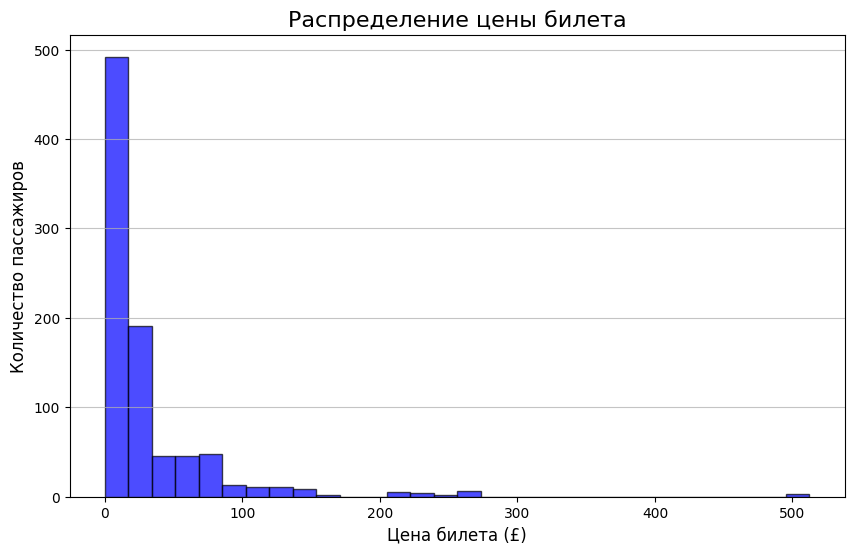

In [16]:
# Построение гистограммы распределения цены билета

plt.figure(figsize=(10, 6))
plt.hist(df["Fare"], bins=30, color="blue", alpha=0.7, edgecolor="black")
plt.title("Распределение цены билета", fontsize=16)
plt.xlabel("Цена билета (£)", fontsize=12)
plt.ylabel("Количество пассажиров", fontsize=12)
plt.grid(axis="y", alpha=0.75)
plt.show()


4. В соответствии с вариантом, определите, верны ли следующие утверждения. Приведите доказательства ответа.

  1. Чем дороже билет, тем выше вероятность выжить.
  2. Мужчинам в катастрофе выжить проще.
  3. Чем больше родственников у человека, тем выше шанс того, что он купит билет третьего класса.
  4. Если Вам больше 70 лет, то шансов выжить в катастрофе у Вас практически нет.
  5. Чем больше родственников у чаловека, тем выше его шанс погибнуть.

In [17]:
# Вариант №1. Чем дороже билет, тем выше вероятность выжить.

average_fare = df.groupby("Survived")["Fare"].mean()
print("Средняя стоимость билета для каждого класса:")
print(average_fare)

if average_fare[1] > average_fare[0]:
    print("Выжившие в среднем покупали более дорогие билеты.")
else:
    print("Стоимость билета не влияет на выживаемость.")


Средняя стоимость билета для каждого класса:
Survived
0    22.208584
1    48.395408
Name: Fare, dtype: float64
Выжившие в среднем покупали более дорогие билеты.


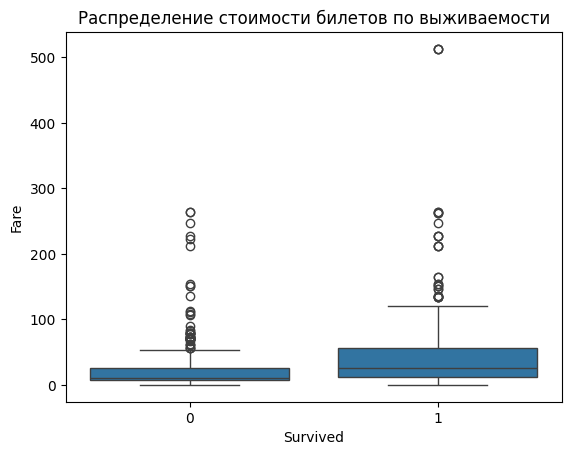

In [18]:
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Распределение стоимости билетов по выживаемости")
plt.show()


5. Столбец с именем пассажиров вряд ли будет иметь значение для последующего анализа данных. Удалите этот столбец из датафрейма. Выведите на экран полученный датасет.

In [19]:
# Удаление столбцва Name с применением к текущему датафрейму
df.drop("Name", axis=1,inplace=True)

6. Столбец "пол пассажира" является категориальным. Закодируйте его с помощью ohe-hot-кодирования (OHE). Выведите на экран полученный датасет.

In [20]:
# Применение one-hot кодирования к столбцу 'Sex'
df_ohe = pd.get_dummies(df, columns=["Sex"], drop_first=True)

# Переименование закодированного столбца
df_ohe.rename(columns={"Sex_male": "Is_Male"}, inplace=True)

# Вывод первых строк нового датафрейма
print(df_ohe.head())


   Survived  Pclass   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
0         0       3  22.0                        1                        0   
1         1       1  38.0                        1                        0   
2         1       3  26.0                        0                        0   
3         1       1  35.0                        1                        0   
4         0       3  35.0                        0                        0   

      Fare  Is_Male  
0   7.2500     True  
1  71.2833    False  
2   7.9250    False  
3  53.1000    False  
4   8.0500     True  


7. Постройте диаграмму рассеяния между признаками "Возраст" и "Цена билета". Проинтерпретируйте ответ.

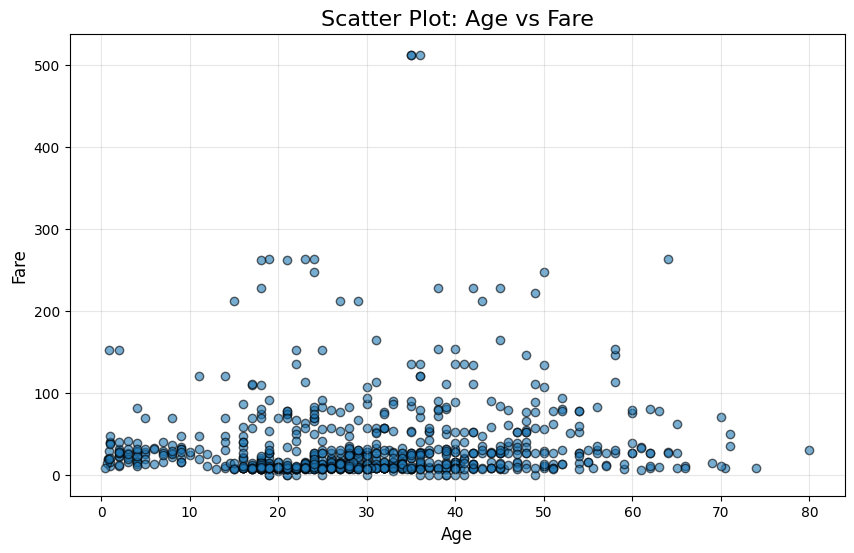

In [21]:
# Ваш код
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], alpha=0.6, edgecolor='k')
plt.title('Scatter Plot: Age vs Fare', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

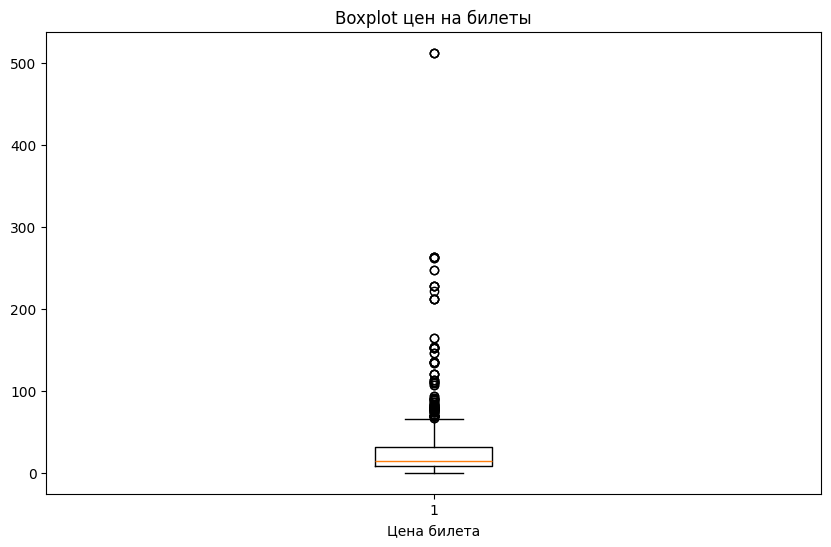

In [22]:
# Строим ящик с усами (boxplot)
plt.figure(figsize=(10,6))
plt.boxplot(x='Fare', data=df)
plt.title('Boxplot цен на билеты')
plt.xlabel('Цена билета')
plt.show()

8. Отнормируйте значения признаков "Возраст" и "Цена билета". Выведите на экран полученный датасет.

In [23]:
# Ваш код
# Нормализация
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Age', 'Fare']

scaler = MinMaxScaler()

data_normalized = df.copy()
data_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

data_normalized.head()


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,0.271174,1,0,0.014151
1,1,1,female,0.472229,1,0,0.139136
2,1,3,female,0.321438,0,0,0.015469
3,1,1,female,0.434531,1,0,0.103644
4,0,3,male,0.434531,0,0,0.015713


9. Постройте гистограммы распределения пассажиров по полу и по возрасту для каждого класса. Расположите гистограммы одна под другой. Оси абсцисс должны быть однаковыми.

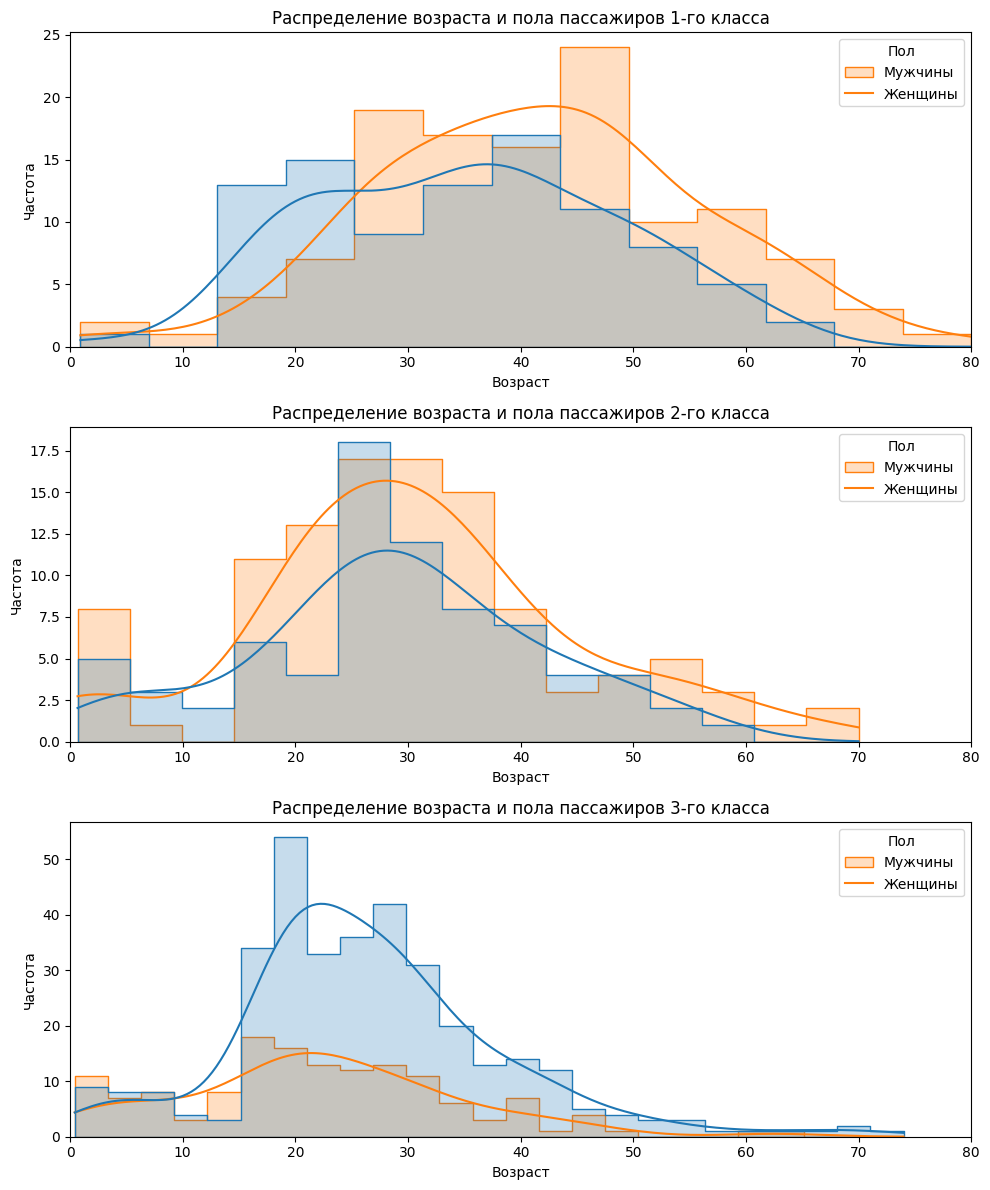

In [24]:
plt.figure(figsize=(10, 12))

# Для каждого класса создаем подграфик
for i, pclass in enumerate(sorted(df['Pclass'].unique()), start=1):
    plt.subplot(3, 1, i)
    sns.histplot(data=df[df['Pclass'] == pclass], x='Age', hue='Sex', element="step", common_norm=False, kde=True)
    plt.title(f'Распределение возраста и пола пассажиров {pclass}-го класса')
    plt.xlabel('Возраст')
    plt.ylabel('Частота')
    plt.legend(title='Пол', labels=['Мужчины', 'Женщины'])
    plt.xlim(0, df['Age'].max())  # делаем оси абсцисс одинаковыми

plt.tight_layout()
plt.show()

10. Сделайте выводы по работе.

В ходе выполнения лабораторной работы:
- Изучил библиотеки Python для работы с данными и вычислениями.
- Научился использовать Goodle Colab для выполнения и визуализации анализа данных.
- Овладел навыками анализа данных, построения графиков и проведения вычислений с матрицами и векторами.